# Capstone Project - The Battle of Neighborhoods (Week 2)

-----------

## Table of Contents

* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

-----------

## Introduction: Business Problem <a name="introduction"></a>

London, the capital of the UK, is considered to be one of the most important global and multicultural cities. It has been ranked by many to be the most visited, expensive, innovative, popular for working, studying, and simply living in. Whether one is moving to London because of studies or work opportunities, one needs to find a nice neighborhood to live in that provides him/her with all the safety, high quality services and standard of life.

### Business Problem

Each London borough has its own characteristics, depending on what one’s preferences are, one needs to decide where to settle down when relocating to London. Some districts offer higher safety, others more local amenities and nightlife activities while somebody may seek for quite neighborhood with park areas and local markets. Of course, there is a budget limitation and time requirements for commuting to school or work that are important aspects when selecting a location of the accommodation, however, these are not to be included in our analysis.    

As there are many factors to be taken into account when looking for a borough where one is going to spend several months or even years of life, we have decided to analyze London’s neighborhoods from safety and venues perspective in order to help potential future Londoners to find a proper and suitable borough. Moreover, these analytics can aid real estate agencies as well, when categorizing the boroughs and giving recommendations to the people searching for a real estate.


### Main Goal

The main objective of this project is to find the best place to live in London, taking into account the crime occurrence and venues density meaning to classify boroughs in London based on the safety indicator (reflecting the current status of the crime incidents) and topmost common venues in each of them (leveraging Foursquare data).

### Target Audience

By analyzing two main attributes (safety and amenities availability), we aim to help people relocating to London to give a better overview of the current living situation in London and recommend them the areas as per their interests and expectations so they can better orient themselves in an unknown city and narrow down their search. This report will be focusing mainly on the stakeholders of general audience (“newcomers” to London) while summarizing the safety and venues categories so they can more conveniently choose the final location as per their preferences.

### Success Criteria

The success criteria of the project will be a good recommendation of a borough to people based on the above-mentioned factors i.e. safety and venues types.

### Problem Solving

Firstly, we analyze the crime dataset in order to better understand the current distribution of crimes across the respective boroughs. In the next step, after obtaining the data related to various venues available in the respective boroughs (leveraging Foursquare data), we cluster the boroughs using the k-means algorithm to get the groups of similar boroughs that can be recommended to the prospects searching for the best area as per their needs/preferences. All the results will be supported with the visualizations in order to more effectively present the outputs of the analysis and underlying relations.

## Data <a name="data"></a>

In order to proceed with the analytics part and to achieve the set objectives, the below data has been collected and processed in order to give us better insight of the safety and venues availability:
-	Total number of crimes in the last two years per borough and crime category
-	The most common venues in each borough that are reported at the time of analysis   

The datasets have been acquired from the following sources:
-	London crime dataset:  
    -	London Datastore: https://data.london.gov.uk/dataset/recorded_crime_summary
-	London boroughs dataset:
    -	Wikipedia: https://en.wikipedia.org/wiki/List_of_London_boroughs
-	London boroughs coordinates:
    -   Geopy API: https://pypi.org/project/geopy/
-	London venues in the respective boroughs:
    -	Foursquare API: https://api.foursquare.com


### London Crime Dataset
- London crime records per borough and crime category in the last two years   
- Source: London Datastore   
- https://data.london.gov.uk/dataset/recorded_crime_summary

In [1]:
# Import the libraries
import pandas as pd
import numpy as np

In [2]:
# Read the crime records data
crime = pd.read_csv('London_Crime_Dataset.csv')
crime.head()

,MajorText,MinorText,BoroughName,201803,201804,201805,201806,201807,201808,201809,...,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,3,4,12,6,5,3,...,11,3,5,3,6,9,8,6,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,115,122,126,123,127,101,107,...,138,113,134,118,109,109,99,121,99,98
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,36,24,33,30,18,33,...,22,27,31,35,37,30,30,25,31,17
3,Burglary,Burglary - Residential,Barking and Dagenham,122,75,93,77,94,84,99,...,114,96,71,67,80,97,114,130,116,121
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,3,8,6,9,7,10,...,8,6,8,6,6,9,10,2,12,3


In [3]:
# Dimension of data
crime.shape

(1575, 27)

In [4]:
# View the information of the dataset 
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 27 columns):
MajorText      1575 non-null object
MinorText      1575 non-null object
BoroughName    1575 non-null object
201803         1575 non-null int64
201804         1575 non-null int64
201805         1575 non-null int64
201806         1575 non-null int64
201807         1575 non-null int64
201808         1575 non-null int64
201809         1575 non-null int64
201810         1575 non-null int64
201811         1575 non-null int64
201812         1575 non-null int64
201901         1575 non-null int64
201902         1575 non-null int64
201903         1575 non-null int64
201904         1575 non-null int64
201905         1575 non-null int64
201906         1575 non-null int64
201907         1575 non-null int64
201908         1575 non-null int64
201909         1575 non-null int64
201910         1575 non-null int64
201911         1575 non-null int64
201912         1575 non-null int64
202001         

In [5]:
# Check if there are any missing values
crime.isnull().sum()

MajorText      0
MinorText      0
BoroughName    0
201803         0
201804         0
201805         0
201806         0
201807         0
201808         0
201809         0
201810         0
201811         0
201812         0
201901         0
201902         0
201903         0
201904         0
201905         0
201906         0
201907         0
201908         0
201909         0
201910         0
201911         0
201912         0
202001         0
202002         0
dtype: int64

In [6]:
# Names of boroughs
crime['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [7]:
# Number of boroughs
crime['BoroughName'].nunique()

33

In [8]:
# Crime types
crime['MajorText'].unique()

array(['Arson and Criminal Damage', 'Burglary', 'Drug Offences',
       'Miscellaneous Crimes Against Society', 'Possession of Weapons',
       'Public Order Offences', 'Robbery', 'Sexual Offences', 'Theft',
       'Vehicle Offences', 'Violence Against the Person'], dtype=object)

In [9]:
# Number of the crime types
crime['MajorText'].nunique()

11

In [10]:
# Create a column of the total number of crime incidents in last two years
crime['Total'] = crime.iloc[:,3:27].sum(axis=1)
crime.head()

,MajorText,MinorText,BoroughName,201803,201804,201805,201806,201807,201808,201809,...,201906,201907,201908,201909,201910,201911,201912,202001,202002,Total
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,3,4,12,6,5,3,...,3,5,3,6,9,8,6,4,4,129
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,115,122,126,123,127,101,107,...,113,134,118,109,109,99,121,99,98,2775
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,36,24,33,30,18,33,...,27,31,35,37,30,30,25,31,17,726
3,Burglary,Burglary - Residential,Barking and Dagenham,122,75,93,77,94,84,99,...,96,71,67,80,97,114,130,116,121,2430
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,3,8,6,9,7,10,...,6,8,6,6,9,10,2,12,3,155


In [11]:
# Create dataframe with the columns to be analyzed in the next steps
crime_df = crime[['MajorText', 'BoroughName', 'Total']]
crime_df.columns = ['CrimeCategory', 'BoroughName', 'Total'] 

In [12]:
crime_df.head()

,CrimeCategory,BoroughName,Total
0,Arson and Criminal Damage,Barking and Dagenham,129
1,Arson and Criminal Damage,Barking and Dagenham,2775
2,Burglary,Barking and Dagenham,726
3,Burglary,Barking and Dagenham,2430
4,Drug Offences,Barking and Dagenham,155


In [13]:
# Calculate total of incidents in the last two years per borough and crime type
crime_df = crime_df.groupby(['BoroughName','CrimeCategory'], as_index=False).sum()
crime_df.head()

,BoroughName,CrimeCategory,Total
0,Barking and Dagenham,Arson and Criminal Damage,2904
1,Barking and Dagenham,Burglary,3156
2,Barking and Dagenham,Drug Offences,2142
3,Barking and Dagenham,Miscellaneous Crimes Against Society,577
4,Barking and Dagenham,Possession of Weapons,370


In [14]:
# Calculate monthly average
crime_df['MonthlyAverage'] = crime_df['Total']/24
crime_df.head()

,BoroughName,CrimeCategory,Total,MonthlyAverage
0,Barking and Dagenham,Arson and Criminal Damage,2904,121.000000
1,Barking and Dagenham,Burglary,3156,131.500000
2,Barking and Dagenham,Drug Offences,2142,89.250000
3,Barking and Dagenham,Miscellaneous Crimes Against Society,577,24.041667
4,Barking and Dagenham,Possession of Weapons,370,15.416667


In [15]:
# Explore the clean dataset - borough with most incidents
crime_df.sort_values(by='MonthlyAverage', ascending=False).head()

,BoroughName,CrimeCategory,Total,MonthlyAverage
360,Westminster,Theft,80639,3359.958333
63,Camden,Theft,32228,1342.833333
305,Southwark,Theft,23616,984.000000
362,Westminster,Violence Against the Person,21629,901.208333
195,Islington,Theft,20239,843.291667


In [16]:
# Explore the clean dataset - borough with least incidents
crime_df.sort_values(by='MonthlyAverage', ascending=True).head()

,BoroughName,CrimeCategory,Total,MonthlyAverage
248,London Heathrow and London City Airports,Robbery,9,0.375000
243,London Heathrow and London City Airports,Burglary,49,2.041667
246,London Heathrow and London City Airports,Possession of Weapons,68,2.833333
249,London Heathrow and London City Airports,Sexual Offences,97,4.041667
290,Richmond upon Thames,Possession of Weapons,122,5.083333


### London Boroughs Dataset 
- List of London boroughs and the population in the respective borough that is to be used to calculate the ratio of the crimes per 1000 people     
- Source: Wikipedia   
- https://en.wikipedia.org/wiki/List_of_London_boroughs

In [17]:
# Import the libraries
import requests
import lxml
from bs4 import BeautifulSoup

In [18]:
url = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
page = requests.get(url)
html = BeautifulSoup(page.content)

soup = BeautifulSoup(str(html))
neighborhood_table = soup.find('table')
table = str(neighborhood_table.extract())
df = pd.read_html(table)[0]
df.head()

c:\users\bhusak\appdata\local\programs\python\python37\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\bhusak\appdata\local\programs\python\python37\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [19]:
df.shape

(32, 10)

In [20]:
# Create a dataframe with the columns that are to be used in the analysis
london_df = df[['Borough', 'Population (2013 est)[1]']]

In [21]:
# Rename the columns
london_df.rename(columns={'Population (2013 est)[1]':'Population'},inplace=True)

c:\users\bhusak\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [22]:
# First 5 records of the dataframe to see if the changes have been applied
london_df.head()

,Borough,Population
0,Barking and Dagenham [note 1],194352
1,Barnet,369088
2,Bexley,236687
3,Brent,317264
4,Bromley,317899


In [23]:
# List of all the boroughs
london_df['Borough'].unique()

array(['Barking and Dagenham [note 1]', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich [note 2]', 'Hackney', 'Hammersmith and Fulham [note 4]',
       'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
       'Islington', 'Kensington and Chelsea', 'Kingston upon Thames',
       'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [24]:
# Strip unwanted texts
london_df.loc[:,'Borough'] = london_df['Borough'].str.replace(r'(\[note\s\d\])','')

c:\users\bhusak\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### London Boroughs Coordinates
- Get the coordinates of the respective boroughs
- Source: Geopy API
- https://pypi.org/project/geopy/

In [56]:
from geopy.geocoders import Nominatim

In [26]:
Latitude = []
Longitude = []

for i in range(len(london_df)):
    address = '{},London,United Kingdom'.format(london_df['Borough'][i])
    geolocator = Nominatim(user_agent="london_agent",timeout=20)
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.5541171, 51.65309, 51.4416793, 51.563825800000004, 51.4028046, 51.5423045, 51.3713049, 51.5126553, 51.6520851, 51.4820845, 51.5432402, 51.4920377, 51.587929849999995, 51.5967688, 51.5443687, 51.542519299999995, 51.4686132, 51.5384287, 51.4989948, 51.4096275, 51.5013012, 51.4624325, 51.410802849999996, 51.52999955, 51.5763203, 51.44046095, 51.5029222, 51.3575114, 51.5086717, 51.59816935, 51.4570271, 51.5013562] [0.15050434261994267, -0.2002261, 0.150488, -0.2757596561855699, 0.0148142, -0.1395604, -0.101957, -0.3051952, -0.0810175, -0.0045417, -0.0493621, -0.2236401, -0.10541010599099046, -0.33727515543507014, -0.1443031798919795, -0.44833493117949663, -0.3613471, -0.0999051, -0.1991229, -0.3062621, -0.117287, -0.0101331, -0.18809850595572736, 0.02931796029382208, 0.0454097, -0.3055192359117199, -0.103458, -0.173640122600872, -0.016911860933345766, -0.01783667461048707, -0.1932607, -0.1249302]


In [27]:
# Add the coordinates to the dataframe with the list of boroughs and population
london_df.loc[:,'Latitude'] = Latitude
london_df.loc[:,'Longitude'] = Longitude

c:\users\bhusak\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [28]:
london_df.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.554117,0.150504
1,Barnet,369088,51.653090,-0.200226
2,Bexley,236687,51.441679,0.150488
3,Brent,317264,51.563826,-0.275760
4,Bromley,317899,51.402805,0.014814


In [29]:
london_df.shape

(32, 4)

### London Venues in the Respective Boroughs
- List of top 50 venues in the neighborhood
- Source: Foursquare API
- https://api.foursquare.com

In [30]:
# Foursquare credentials
LIMIT = 50

CLIENT_ID = 'X5O4FDODT5F1JPSLGULFUTG2FKH4BOSRCU1P0VKZDQFYELMW' # your Foursquare ID
CLIENT_SECRET = 'Y5FMQSSHBRNEVMMVQ1RMNFP4TK0T0IH5XHE1ILMZ5B5Z5WGZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: X5O4FDODT5F1JPSLGULFUTG2FKH4BOSRCU1P0VKZDQFYELMW
CLIENT_SECRET:Y5FMQSSHBRNEVMMVQ1RMNFP4TK0T0IH5XHE1ILMZ5B5Z5WGZ


In [31]:
# Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
#Get top 50 venues in 1500m radius of the center of each Borough
venues = getNearbyVenues(names=london_df['Borough'],
                                   latitudes=london_df['Latitude'],
                                   longitudes=london_df['Longitude']
                                  )

Barking and Dagenham 
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich 
Hackney
Hammersmith and Fulham 
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [33]:
print(venues.shape)
venues.head()

(1443, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.554117,0.150504,Lara Grill,51.562445,0.147178,Turkish Restaurant
2,Barking and Dagenham,51.554117,0.150504,Iceland,51.560578,0.147685,Grocery Store
3,Barking and Dagenham,51.554117,0.150504,Wilko,51.541002,0.148898,Furniture / Home Store
4,Barking and Dagenham,51.554117,0.150504,Shell,51.560415,0.148364,Gas Station


## Methodology <a name="methodology"></a>

This section consists of 3 main parts:
- Exploratory data analysis will serve us as the source of better understanding the distribution of the crimes across the boroughs as well as map's visualizations will help us fully grasp the geographic layout of the boroughs
- Modelling part will focus on the unsupervised learning algorithm, namely k-means through which we will cluster the similar boroughs into 5 clusters in order to be able to analyze these from venues perspective/density/type
- Cluster analysis will concentrate on the overview of each group of boroughs with the venues in order to better understand which venues are most typical for the respective clusters and perform the classification of these into more informative categories

### Exploratory Data Analysis

In [34]:
# Review our data
crime_df.head()

,BoroughName,CrimeCategory,Total,MonthlyAverage
0,Barking and Dagenham,Arson and Criminal Damage,2904,121.000000
1,Barking and Dagenham,Burglary,3156,131.500000
2,Barking and Dagenham,Drug Offences,2142,89.250000
3,Barking and Dagenham,Miscellaneous Crimes Against Society,577,24.041667
4,Barking and Dagenham,Possession of Weapons,370,15.416667


In [35]:
london_df.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.554117,0.150504
1,Barnet,369088,51.653090,-0.200226
2,Bexley,236687,51.441679,0.150488
3,Brent,317264,51.563826,-0.275760
4,Bromley,317899,51.402805,0.014814


In [36]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.554117,0.150504,Lara Grill,51.562445,0.147178,Turkish Restaurant
2,Barking and Dagenham,51.554117,0.150504,Iceland,51.560578,0.147685,Grocery Store
3,Barking and Dagenham,51.554117,0.150504,Wilko,51.541002,0.148898,Furniture / Home Store
4,Barking and Dagenham,51.554117,0.150504,Shell,51.560415,0.148364,Gas Station


In [37]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Prepare data for visualization
crime_df_b = crime_df.groupby(['BoroughName']).sum()
crime_df_b = crime_df_b.sort_values(by='MonthlyAverage', ascending=False)

In [39]:
crime_df_b.reset_index(inplace=True)

In [40]:
crime_df_b.head()

,BoroughName,Total,MonthlyAverage
0,Westminster,149734,6238.916667
1,Southwark,76149,3172.875000
2,Camden,76081,3170.041667
3,Newham,72506,3021.083333
4,Lambeth,71240,2968.333333


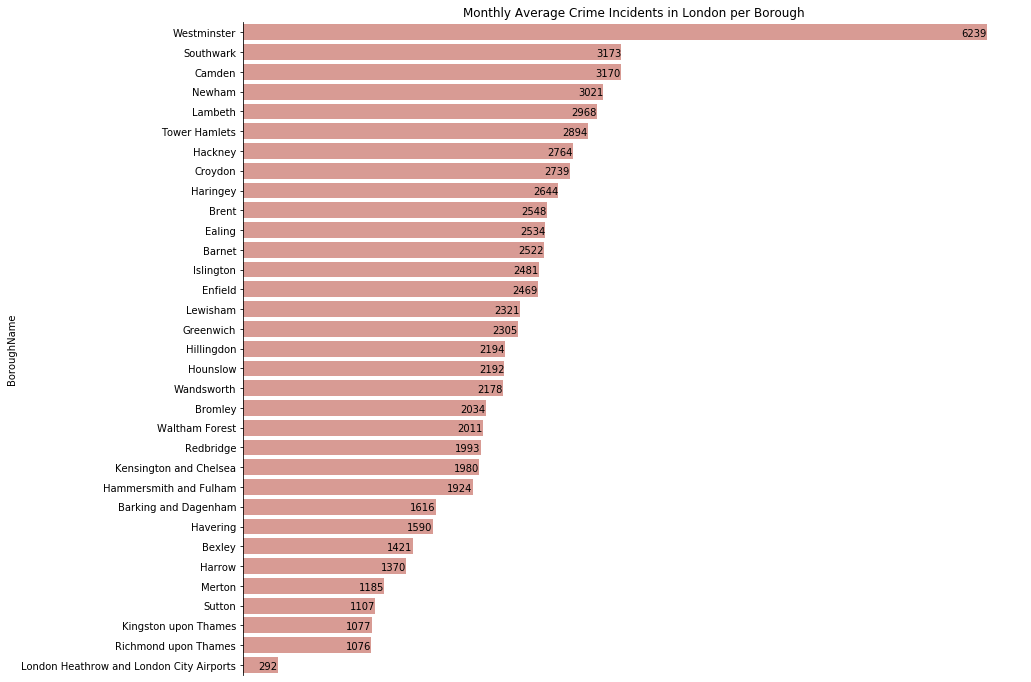

In [41]:
# Visualize crime data per Borough
plt.figure(figsize=(14,12))
ax = sns.barplot(x='MonthlyAverage',y='BoroughName',data=crime_df_b,color="salmon", saturation=.5)
plt.title('Monthly Average Crime Incidents in London per Borough')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.xaxis.set_visible(False)
for p in ax.patches:
    width = p.get_width()
    ax.text(width -1.5  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:.0f}'.format(width),
            ha="right")
plt.show()

Westminster has the biggest number of reported crimes, followed by Southwark, Camden and Newham.

In [42]:
# Prepare data for visualization
crime_df_c = crime_df.groupby(['CrimeCategory']).sum()
crime_df_c = crime_df_c.sort_values(by='MonthlyAverage', ascending=False)

In [43]:
crime_df_c.reset_index(inplace=True)

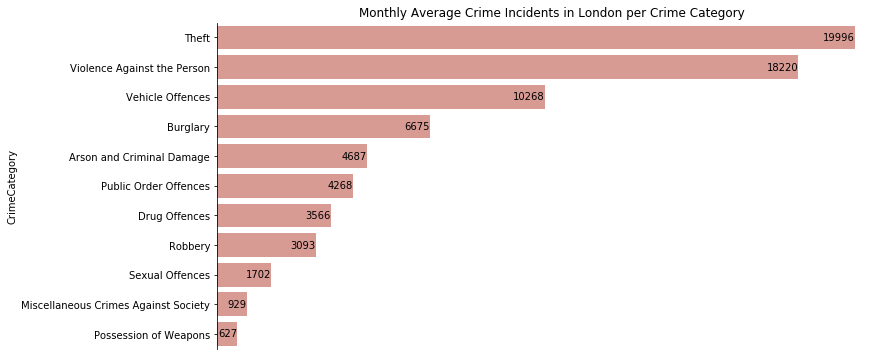

In [44]:
# Visualize crime data per category
plt.figure(figsize=(12,6))
ax = sns.barplot(x='MonthlyAverage',y='CrimeCategory',data=crime_df_c,color="salmon", saturation=.5)
plt.title('Monthly Average Crime Incidents in London per Crime Category')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.xaxis.set_visible(False)
for p in ax.patches:
    width = p.get_width()
    ax.text(width -1.5  ,
            p.get_y()+p.get_height()/2. + 0.1,
            '{:.0f}'.format(width),
            ha="right")
plt.show()

Theft and violence against person are two most occurring crime categories, followed by vehicle offences and burglary.

In [45]:
# Drop Heathrow Airport as it is not a residential area & not included in population data
crime_df_b.drop(crime_df_b[crime_df_b['BoroughName']=='London Heathrow and London City Airports'].index, inplace=True)

In [46]:
london_df.rename(columns={'Borough':'BoroughName'},inplace=True)

c:\users\bhusak\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [47]:
london_df.loc[:,'BoroughName'] = london_df['BoroughName'].str.strip()

c:\users\bhusak\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
# Check if the Boroughs in both the data frames match
set(crime_df_b.BoroughName) - set(london_df.BoroughName)

set()

In [49]:
# Combine crime data and borough information data
df = pd.merge(crime_df_b,london_df, how='outer', on='BoroughName')
df.head()

,BoroughName,Total,MonthlyAverage,Population,Latitude,Longitude
0,Westminster,149734,6238.916667,226841,51.501356,-0.124930
1,Southwark,76149,3172.875000,298464,51.502922,-0.103458
2,Camden,76081,3170.041667,229719,51.542305,-0.139560
3,Newham,72506,3021.083333,318227,51.530000,0.029318
4,Lambeth,71240,2968.333333,314242,51.501301,-0.117287


In [50]:
df.shape

(32, 6)

In [51]:
# Check data type
df.dtypes

BoroughName        object
Total               int64
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [52]:
# Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeIndicator'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,Total,MonthlyAverage,Population,Latitude,Longitude,CrimeIndicator
0,Westminster,149734,6238.916667,226841,51.501356,-0.124930,27.503479
1,Southwark,76149,3172.875000,298464,51.502922,-0.103458,10.630679
2,Camden,76081,3170.041667,229719,51.542305,-0.139560,13.799649
3,Newham,72506,3021.083333,318227,51.530000,0.029318,9.493485
4,Lambeth,71240,2968.333333,314242,51.501301,-0.117287,9.446011


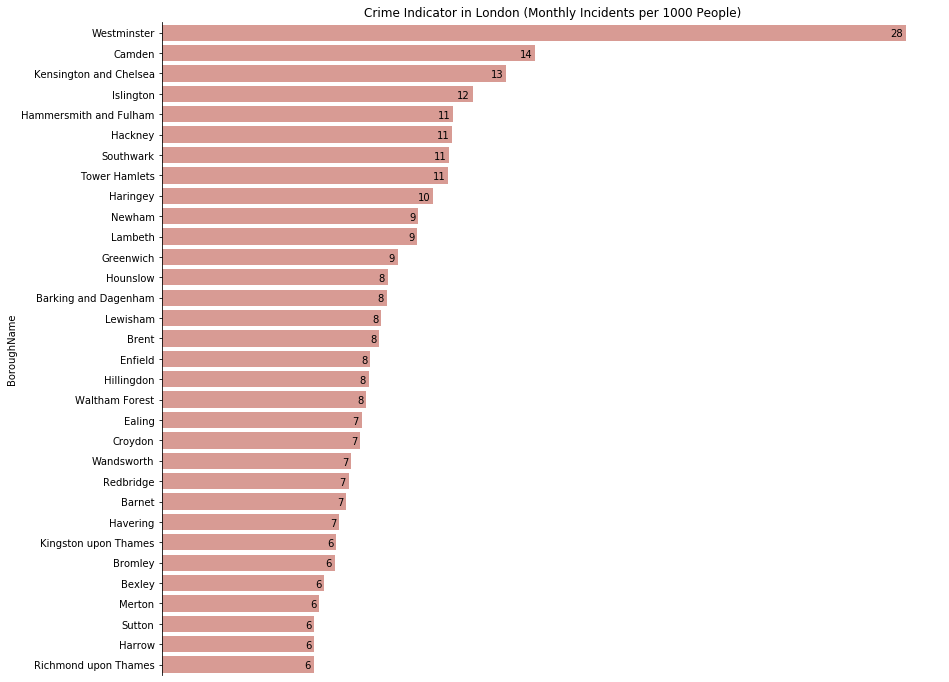

In [53]:
# Visualize crime per Crime Indicator (crimes per 1000 people)
plt.figure(figsize=(14,12))
df = df.sort_values(by='CrimeIndicator',ascending=False)
ax = sns.barplot(x='CrimeIndicator',y='BoroughName',data=df,color="salmon", saturation=.5)
plt.title('Crime Indicator in London (Monthly Incidents per 1000 People)')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.xaxis.set_visible(False)
for p in ax.patches:
    width = p.get_width()
    ax.text(width -0.1,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:.0f}'.format(width),
            ha="right")
plt.show()

We can see that Westminster and Camden still remain top 2 dangerous areas even after taking population into consideration. However, there is a change on the 3rd and 4th position as Kensington and Chelsea, and Islington appeared in the list.

In [54]:
# Import libraries
import folium

In [57]:
# Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="london_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [58]:
# Make a map of London with the Boroughs using Folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

### Modelling   
In this section, we will perform k-means clustering to group the boroughs according to what amenities they have using Foursquare data.

In [59]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 209 uniques categories.


In [60]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix='', prefix_sep='')

In [61]:
# Add Borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
onehot.shape

(1443, 210)

In [63]:
# Group rows by Borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000000,0.00000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,...,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00
1,Barnet,0.000000,0.00000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,...,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.022222,0.00,0.00
2,Bexley,0.000000,0.00000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,...,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00
3,Brent,0.000000,0.00000,0.02,0.00,0.000000,0.00,0.00,0.020000,0.00,...,0.00000,0.000000,0.00,0.00,0.00,0.02,0.00,0.000000,0.00,0.00
4,Bromley,0.000000,0.00000,0.02,0.00,0.000000,0.00,0.00,0.020000,0.00,...,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00
5,Camden,0.000000,0.00000,0.00,0.02,0.000000,0.00,0.00,0.000000,0.00,...,0.04000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.02
6,Croydon,0.000000,0.00000,0.00,0.00,0.000000,0.00,0.02,0.020000,0.00,...,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00
7,Ealing,0.000000,0.00000,0.00,0.00,0.020000,0.00,0.00,0.000000,0.00,...,0.00000,0.000000,0.00,0.00,0.02,0.00,0.04,0.000000,0.00,0.00
8,Enfield,0.000000,0.00000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.02,...,0.00000,0.000000,0.02,0.00,0.00,0.00,0.00,0.000000,0.02,0.00
9,Greenwich,0.000000,0.00000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,...,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.020000,0.00,0.00


In [64]:
# Top 5 venues for each Borough
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham ----
                  venue  freq
0           Supermarket  0.13
1         Grocery Store  0.13
2            Restaurant  0.04
3  Gym / Fitness Center  0.04
4                 Plaza  0.04


----Barnet----
           venue  freq
0    Coffee Shop  0.11
1            Pub  0.11
2  Grocery Store  0.07
3           Park  0.07
4    Golf Course  0.04


----Bexley----
                     venue  freq
0                      Pub  0.21
1               Steakhouse  0.07
2                    Hotel  0.07
3  Fruit & Vegetable Store  0.07
4                Gastropub  0.07


----Brent----
            venue  freq
0     Coffee Shop  0.14
1           Hotel  0.10
2  Clothing Store  0.06
3   Grocery Store  0.06
4  Sandwich Place  0.04


----Bromley----
                  venue  freq
0                   Pub  0.12
1        Clothing Store  0.08
2           Coffee Shop  0.06
3  Gym / Fitness Center  0.06
4          Burger Joint  0.04


----Camden----
                venue  freq
0                

In [65]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Supermarket,Grocery Store,Bus Station,Gas Station,Martial Arts Dojo,Bus Stop,Convenience Store,Restaurant,Park,Golf Course
1,Barnet,Coffee Shop,Pub,Park,Grocery Store,Italian Restaurant,Golf Course,Bookstore,Café,Restaurant,Pizza Place
2,Bexley,Pub,Greek Restaurant,Playground,Fast Food Restaurant,Chinese Restaurant,Fruit & Vegetable Store,Steakhouse,Garden,Gastropub,Museum
3,Brent,Coffee Shop,Hotel,Grocery Store,Clothing Store,Indian Restaurant,Sporting Goods Shop,Sandwich Place,Burger Joint,Stadium,Pedestrian Plaza
4,Bromley,Pub,Clothing Store,Gym / Fitness Center,Coffee Shop,Burger Joint,Pizza Place,Indian Restaurant,Supermarket,Stationery Store,Burrito Place


In [66]:
# Import libraries for k-means clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [67]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10] 

array([1, 1, 4, 3, 3, 2, 2, 2, 3, 4])

In [68]:
# Strip the whitespaces in the Borough naming
venues_sorted['BoroughName'] = venues_sorted['BoroughName'].str.strip()
df['BoroughName'] = df['BoroughName'].str.strip()

In [69]:
# Add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# Merge london_grouped with london coordinates to add latitude/longitude for each Borough
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

,BoroughName,Total,MonthlyAverage,Population,Latitude,Longitude,CrimeIndicator,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Westminster,149734,6238.916667,226841,51.501356,-0.124930,27.503479,0,Hotel,Coffee Shop,Café,Theater,Park,Event Space,Plaza,Art Gallery,Bar,Skate Park
2,Camden,76081,3170.041667,229719,51.542305,-0.139560,13.799649,2,Pub,Coffee Shop,Café,Market,Music Venue,Vegetarian / Vegan Restaurant,Park,Italian Restaurant,Pizza Place,Portuguese Restaurant
22,Kensington and Chelsea,47517,1979.875000,155594,51.498995,-0.199123,12.724623,2,Pub,Gym / Fitness Center,Restaurant,Hotel,Italian Restaurant,Café,Indian Restaurant,Pizza Place,Japanese Restaurant,Bakery
12,Islington,59540,2480.833333,215667,51.538429,-0.099905,11.503073,2,Pub,Bakery,Japanese Restaurant,Gastropub,Cocktail Bar,Trail,Mediterranean Restaurant,Arts & Crafts Store,Theater,Movie Theater
23,Hammersmith and Fulham,46188,1924.500000,178685,51.492038,-0.223640,10.770350,2,Pub,Coffee Shop,Park,Japanese Restaurant,French Restaurant,Café,Tapas Restaurant,Pizza Place,Grocery Store,Cocktail Bar


### Cluster Analysis

Let's take a look at each cluster to see what the main attributes are and create namings representing cluster's characteristics.

In [70]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the blue cluster which is the cluster No 2. Other clusters' size ranges from 3 - 8 boroughs.

#### Cluster 0

In [71]:
# Cluster 0: CULTURAL AREA
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(6, london_merged.shape[1]))]]

,BoroughName,CrimeIndicator,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Westminster,27.503479,0,Hotel,Coffee Shop,Café,Theater,Park,Event Space,Plaza,Art Gallery,Bar,Skate Park
1,Southwark,10.630679,0,Theater,Scenic Lookout,Coffee Shop,Hotel,Grocery Store,Italian Restaurant,Art Museum,Street Food Gathering,Seafood Restaurant,Pub
4,Lambeth,9.446011,0,Theater,Hotel,Scenic Lookout,Park,Art Gallery,Plaza,Cupcake Shop,Sandwich Place,Cocktail Bar,Coffee Shop


The cluster No 0 is located in the city center so can be considered to be a cultural and traveler area which consists of venues such as theaters, hotels, parks, restaurants, museums and galleries. This borough might be more touristic, however, it also has its own magic and atmosphere that makes this area unique. 

#### Cluster 1

In [77]:
# Cluster 1: VIBRANT AREA
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(6, london_merged.shape[1]))]]

,BoroughName,CrimeIndicator,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Haringey,10.036600,1,Turkish Restaurant,Café,Pub,Mediterranean Restaurant,Bakery,Park,Coffee Shop,Polish Restaurant,Supermarket,Lounge
3,Newham,9.493485,1,Grocery Store,Pub,Indian Restaurant,Park,Café,Bus Stop,Gym / Fitness Center,Breakfast Spot,Coffee Shop,Shopping Mall
24,Barking and Dagenham,8.317383,1,Supermarket,Grocery Store,Bus Station,Gas Station,Martial Arts Dojo,Bus Stop,Convenience Store,Restaurant,Park,Golf Course
16,Hillingdon,7.651368,1,Pub,Grocery Store,Chinese Restaurant,Pizza Place,Park,Fast Food Restaurant,Sports Club,Gas Station,Breakfast Spot,Golf Course
20,Waltham Forest,7.566081,1,Pub,Turkish Restaurant,Park,Gym,Grocery Store,Café,Supermarket,Pizza Place,Bus Stop,Soccer Field
21,Redbridge,6.912453,1,Pizza Place,Pub,Park,Bakery,Grocery Store,Italian Restaurant,English Restaurant,Indian Restaurant,Café,Mediterranean Restaurant
11,Barnet,6.833736,1,Coffee Shop,Pub,Park,Grocery Store,Italian Restaurant,Golf Course,Bookstore,Café,Restaurant,Pizza Place
29,Sutton,5.651927,1,Pub,Grocery Store,Park,Café,Italian Restaurant,Coffee Shop,Bar,Pizza Place,Bakery,Portuguese Restaurant


In the cluster one, we can see that the most common venues are pubs, restaurants, cafes, supermarkets, grocery stores and parks. So everybody can find here all one needs, places to go for shopping as well as entertainment, and with gardens and parks to do some sports or some outside activities.

#### Cluster 2

In [115]:
# Cluster 2: COSMOPOLITAN AREA
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(6, london_merged.shape[1]))]]

,BoroughName,CrimeIndicator,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Merton,5.829393,2,Park,Pub,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Thai Restaurant,Theater,Portuguese Restaurant
30,Kingston upon Thames,6.459604,2,Café,Pub,Coffee Shop,Burger Joint,Thai Restaurant,Sushi Restaurant,Cajun / Creole Restaurant,German Restaurant,Latin American Restaurant
25,Havering,6.566183,2,Coffee Shop,Pub,Market,Yoga Studio,Vegetarian / Vegan Restaurant,French Restaurant,Beer Store,Music Venue,Fish Market
18,Wandsworth,7.013863,2,Pub,Coffee Shop,Park,Gastropub,Pizza Place,Supermarket,Café,Gym,Bar
7,Croydon,7.348273,2,Pub,Coffee Shop,Clothing Store,Mediterranean Restaurant,Bookstore,Portuguese Restaurant,Hotel,Park,Indian Restaurant
10,Ealing,7.398061,2,Pub,Coffee Shop,Café,Park,Wine Bar,Hotel,Italian Restaurant,Burger Joint,Pizza Place
14,Lewisham,8.110717,2,Pub,Café,Park,Food Truck,Gastropub,Gym,Turkish Restaurant,Farmers Market,Restaurant
5,Tower Hamlets,10.604395,2,Gym / Fitness Center,Hotel,Coffee Shop,Plaza,Bakery,Street Food Gathering,Park,English Restaurant,Italian Restaurant
6,Hackney,10.737084,2,Pub,Bakery,Coffee Shop,Butcher,Cocktail Bar,Café,Gastropub,Park,Wine Shop
23,Hammersmith and Fulham,10.770350,2,Pub,Coffee Shop,Park,Japanese Restaurant,French Restaurant,Café,Pizza Place,Grocery Store,Cocktail Bar


The second cluster is the biggest one in terms of number of boroughs (13 out of 32 boroughs) that have been classified into this group. One can see that majority of venues are pubs, restaurants, cafes and gyms. As there are many boroughs to choose from, this offers us with wide range of possibilities to search for a place to live while having all the main services available in the walking distance.

#### Cluster 3

In [74]:
# Cluster 3: BUSY AREA
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(6, london_merged.shape[1]))]]

,BoroughName,CrimeIndicator,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Hounslow,8.352959,3,Clothing Store,Coffee Shop,Indian Restaurant,Pub,Sandwich Place,Fast Food Restaurant,Discount Store,Hotel,Supermarket,Bus Stop
9,Brent,8.031429,3,Coffee Shop,Hotel,Grocery Store,Clothing Store,Indian Restaurant,Sporting Goods Shop,Sandwich Place,Burger Joint,Stadium,Pedestrian Plaza
13,Enfield,7.703921,3,Coffee Shop,Pub,Clothing Store,Sandwich Place,Turkish Restaurant,Indian Restaurant,Supermarket,Department Store,Grocery Store,Pharmacy
19,Bromley,6.397472,3,Pub,Clothing Store,Gym / Fitness Center,Coffee Shop,Burger Joint,Pizza Place,Indian Restaurant,Supermarket,Stationery Store,Burrito Place
27,Harrow,5.629242,3,Indian Restaurant,Coffee Shop,Park,Grocery Store,Afghan Restaurant,Café,Sports Bar,Chinese Restaurant,Fish & Chips Shop,Supermarket


The cluster No 3 has many coffee shops, clothing stores, restaurants and pubs so if one enjoys lively area this is the correct choice for him.

#### Cluster 4

In [75]:
# Cluster 4: QUIET AREA
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(6, london_merged.shape[1]))]]

,BoroughName,CrimeIndicator,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Greenwich,8.732374,4,Pub,Garden,Park,Café,Market,Turkish Restaurant,Grocery Store,History Museum,Historic Site,Record Shop
26,Bexley,6.002829,4,Pub,Greek Restaurant,Playground,Fast Food Restaurant,Chinese Restaurant,Fruit & Vegetable Store,Steakhouse,Garden,Gastropub,Museum
31,Richmond upon Thames,5.621674,4,Pub,Café,Park,Garden,Grocery Store,Playground,Hotel,Historic Site,Scenic Lookout,German Restaurant


The last cluster has only 3 boroughs where one can find mainly pubs, parks, gardens, playgrounds and restaurants. Therefore, this is a borough that is more peaceful, however, one can find here all the family needs for living.

## Results and Discussion <a name="results"></a>

The aim of this project is to select the safest area, assembled by the venue’s similarity. Therefore, we have sorted the dataframe based on the Crime Indicator field, assigning each Borough the Cluster from k-means modelling section. Now, per one's preferences, newcomers to London can shortlist the areas of their interest.    

It highly depends what people are looking for so if somebody prefers vibrant or busy areas so these can be found in the boroughs clustered as No 1 and 3. On the other side, if somebody is seeking a quiet area with many parks and playgrounds, then cluster No 4 is ideal for him/her. Cluster 0 is cultural one, however, as we can see it has high criminal indicator. Thus, the factor of safety plays an important role when deciding which borough to select.    

In the below dataframe, one can find both aspects (crime indicator along with cluster specifics) in one place. In the top 5 safest boroughs, 4 types of clusters (Quiet, Busy, Cosmopolitan and Vibrant) are listed, so everybody can find a borough differentiating itself based on the venues’ types while the crime indicator remains low.


In [101]:
crimeindicator = london_merged['CrimeIndicator']
london_merged.drop(['CrimeIndicator'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeIndicator', crimeindicator)
london_merged['Cluster Name'] = london_merged['Cluster Labels'].map({0:'Cultural Borough',1:'Vibrant Borough',2:'Cosmopolitan Borough',3:'Busy Borough',4:'Quiet Borough'})
london_merged.sort_values(by='CrimeIndicator',ascending=True)
london_merged

c:\users\bhusak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BoroughName,CrimeIndicator,Total,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name
31,Richmond upon Thames,5.621674,25819,1075.791667,191365,51.440461,-0.305519,4,Pub,Café,Park,Garden,Grocery Store,Playground,Historic Site,Scenic Lookout,German Restaurant,Quiet Borough
27,Harrow,5.629242,32880,1370.000000,243372,51.596769,-0.337275,3,Indian Restaurant,Coffee Shop,Park,Grocery Store,Afghan Restaurant,Café,Chinese Restaurant,Fish & Chips Shop,Supermarket,Busy Borough
29,Sutton,5.651927,26575,1107.291667,195914,51.357511,-0.173640,1,Pub,Grocery Store,Park,Café,Italian Restaurant,Coffee Shop,Pizza Place,Bakery,Portuguese Restaurant,Vibrant Borough
28,Merton,5.829393,28432,1184.666667,203223,51.410803,-0.188099,2,Park,Pub,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Thai Restaurant,Theater,Portuguese Restaurant,Cosmopolitan Borough
26,Bexley,6.002829,34099,1420.791667,236687,51.441679,0.150488,4,Pub,Greek Restaurant,Playground,Fast Food Restaurant,Chinese Restaurant,Fruit & Vegetable Store,Garden,Gastropub,Museum,Quiet Borough
19,Bromley,6.397472,48810,2033.750000,317899,51.402805,0.014814,3,Pub,Clothing Store,Gym / Fitness Center,Coffee Shop,Burger Joint,Pizza Place,Supermarket,Stationery Store,Burrito Place,Busy Borough
30,Kingston upon Thames,6.459604,25858,1077.416667,166793,51.409627,-0.306262,2,Café,Pub,Coffee Shop,Burger Joint,Thai Restaurant,Sushi Restaurant,Cajun / Creole Restaurant,German Restaurant,Latin American Restaurant,Cosmopolitan Borough
25,Havering,6.566183,38149,1589.541667,242080,51.544369,-0.144303,2,Coffee Shop,Pub,Market,Yoga Studio,Vegetarian / Vegan Restaurant,French Restaurant,Beer Store,Music Venue,Fish Market,Cosmopolitan Borough
11,Barnet,6.833736,60534,2522.250000,369088,51.653090,-0.200226,1,Coffee Shop,Pub,Park,Grocery Store,Italian Restaurant,Golf Course,Café,Restaurant,Pizza Place,Vibrant Borough
21,Redbridge,6.912453,47824,1992.666667,288272,51.576320,0.045410,1,Pizza Place,Pub,Park,Bakery,Grocery Store,Italian Restaurant,Indian Restaurant,Café,Mediterranean Restaurant,Vibrant Borough


In [102]:
cols = london_merged.columns.tolist()
cols = cols[0:8] + cols[-1:] + cols[8:-1]
london_merged = london_merged[cols]

In [107]:
top5_df = london_merged.head()
top5_df.reset_index(drop=True)

,BoroughName,CrimeIndicator,Total,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,Cluster Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Richmond upon Thames,5.621674,25819,1075.791667,191365,51.440461,-0.305519,4,Quiet Borough,Pub,Café,Park,Garden,Grocery Store,Playground,Historic Site,Scenic Lookout,German Restaurant
1,Harrow,5.629242,32880,1370.000000,243372,51.596769,-0.337275,3,Busy Borough,Indian Restaurant,Coffee Shop,Park,Grocery Store,Afghan Restaurant,Café,Chinese Restaurant,Fish & Chips Shop,Supermarket
2,Sutton,5.651927,26575,1107.291667,195914,51.357511,-0.173640,1,Vibrant Borough,Pub,Grocery Store,Park,Café,Italian Restaurant,Coffee Shop,Pizza Place,Bakery,Portuguese Restaurant
3,Merton,5.829393,28432,1184.666667,203223,51.410803,-0.188099,2,Cosmopolitan Borough,Park,Pub,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Thai Restaurant,Theater,Portuguese Restaurant
4,Bexley,6.002829,34099,1420.791667,236687,51.441679,0.150488,4,Quiet Borough,Pub,Greek Restaurant,Playground,Fast Food Restaurant,Chinese Restaurant,Fruit & Vegetable Store,Garden,Gastropub,Museum


In [108]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(top5_df['Latitude'], top5_df['Longitude'], top5_df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

## Conclusion <a name="conclusion"></a>

From our data-driven analysis, one can find useful information on the overview of the current safety status along with the most common venues. As one can see, all the safest areas are suburban ones, in south-west, east and north London. The analytics comprises of two perspectives of the respective boroughs, so it would be helpful to incorporate also other factors, such as the real estate prices, time to commute to work/school, cost of living, budget limitations, etc. The crime dataset provides the details on the type of the crime so this could be included as well into analyzing safety in order to distinguish the seriousness of the committed crime and this way create weights that could increase the accuracy of the safety indicator. However, the current research successfully performed the high-level analysis and provides people searching for a place to live in London a recommendation based on the most popular venues types and safety. This project enables/helps future Londoners to make more informed decision when looking for a safe borough in London.

----------